In [ ]:
CASE DE VENDAS


In [64]:
import pandas as pd
from statsforecast import StatsForecast
from statsforecast.models import AutoETS
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv(r"C:\Users\renet\Downloads\treinamentos_ia 5\resumo_vendas.csv")
df

,ds,y
0,8/28/2025,404.52
1,8/28/2025,975.68
2,8/28/2025,169.47
3,8/28/2025,5783.64
4,8/28/2025,83.81
...,...,...
27346,1/6/2021,222.11
27347,1/6/2021,45134.00
27348,1/6/2021,689.44
27349,1/6/2021,47701.01


In [66]:
df['ds'] = pd.to_datetime(df['ds'])
df_grouped = df.groupby(df['ds'].dt.to_period('M'))['y'].sum().reset_index()
df_grouped['ds'] = df_grouped['ds'].dt.to_timestamp()

In [67]:
print(df_grouped.head())

          ds            y
0 2021-01-01   3632707.42
1 2021-02-01  12812183.31
2 2021-03-01  21306031.44
3 2021-04-01   2329599.24
4 2021-05-01   9424709.03


In [68]:
df_grouped['unique_id'] = 'serie1'
df_grouped = df_grouped[['unique_id', 'ds', 'y']]

In [69]:
sf = StatsForecast(
    models=[AutoETS(season_length=12)],
    freq='ME',
    n_jobs=-1
)

In [70]:
sf.fit(df_grouped)
forecast = sf.predict(h=29)

In [71]:
print(forecast.head())

  unique_id         ds       AutoETS
0    serie1 2025-08-31  5.921026e+06
1    serie1 2025-09-30  1.104504e+07
2    serie1 2025-10-31  1.341850e+07
3    serie1 2025-11-30  9.136039e+06
4    serie1 2025-12-31  1.439422e+07


In [72]:
# histórico
history = df_grouped.copy()

In [73]:

# renomear para combinar depois
history = history.rename(columns={'y': 'valor_real'})

In [74]:

# juntar histórico e previsão
resultados = pd.concat([
    history[['ds', 'valor_real']],
    forecast.rename(columns={'AutoETS': 'previsao'})
], axis=0)

In [75]:
print(resultados.tail(20))

           ds  valor_real unique_id      previsao
9  2026-05-31         NaN    serie1  1.032537e+07
10 2026-06-30         NaN    serie1  2.557296e+07
11 2026-07-31         NaN    serie1  1.031901e+07
12 2026-08-31         NaN    serie1  5.921026e+06
13 2026-09-30         NaN    serie1  1.104504e+07
14 2026-10-31         NaN    serie1  1.341850e+07
15 2026-11-30         NaN    serie1  9.136039e+06
16 2026-12-31         NaN    serie1  1.439422e+07
17 2027-01-31         NaN    serie1  8.784345e+06
18 2027-02-28         NaN    serie1  1.904513e+07
19 2027-03-31         NaN    serie1  7.609998e+06
20 2027-04-30         NaN    serie1  6.240851e+06
21 2027-05-31         NaN    serie1  1.032537e+07
22 2027-06-30         NaN    serie1  2.557296e+07
23 2027-07-31         NaN    serie1  1.031901e+07
24 2027-08-31         NaN    serie1  5.921026e+06
25 2027-09-30         NaN    serie1  1.104504e+07
26 2027-10-31         NaN    serie1  1.341850e+07
27 2027-11-30         NaN    serie1  9.136039e+06


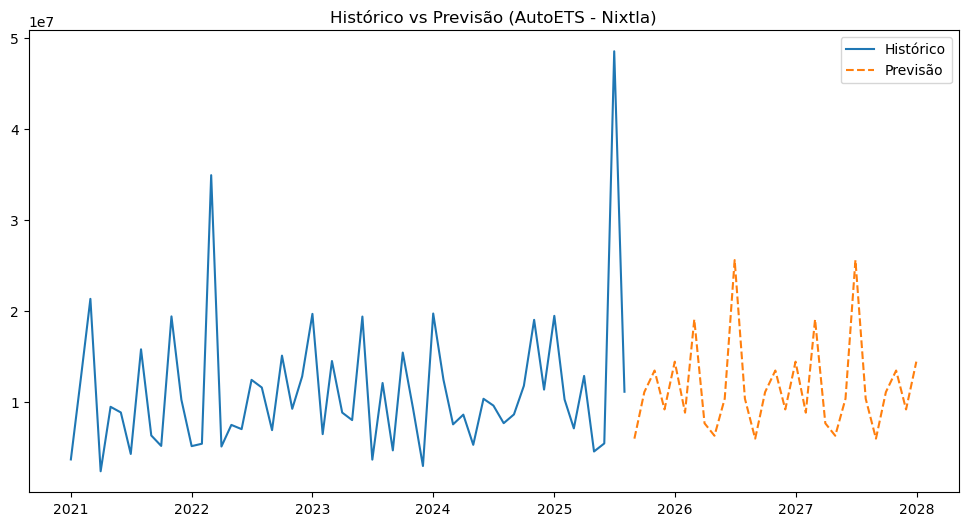

In [76]:
plt.figure(figsize=(12,6))
plt.plot(history['ds'], history['valor_real'], label='Histórico')
plt.plot(forecast['ds'], forecast['AutoETS'], label='Previsão', linestyle='--')
plt.legend()
plt.title("Histórico vs Previsão (AutoETS - Nixtla)")
plt.show()

In [77]:
previsao_mensal = forecast[['ds', 'AutoETS']]
print(previsao_mensal)


           ds       AutoETS
0  2025-08-31  5.921026e+06
1  2025-09-30  1.104504e+07
2  2025-10-31  1.341850e+07
3  2025-11-30  9.136039e+06
4  2025-12-31  1.439422e+07
5  2026-01-31  8.784345e+06
6  2026-02-28  1.904513e+07
7  2026-03-31  7.609998e+06
8  2026-04-30  6.240851e+06
9  2026-05-31  1.032537e+07
10 2026-06-30  2.557296e+07
11 2026-07-31  1.031901e+07
12 2026-08-31  5.921026e+06
13 2026-09-30  1.104504e+07
14 2026-10-31  1.341850e+07
15 2026-11-30  9.136039e+06
16 2026-12-31  1.439422e+07
17 2027-01-31  8.784345e+06
18 2027-02-28  1.904513e+07
19 2027-03-31  7.609998e+06
20 2027-04-30  6.240851e+06
21 2027-05-31  1.032537e+07
22 2027-06-30  2.557296e+07
23 2027-07-31  1.031901e+07
24 2027-08-31  5.921026e+06
25 2027-09-30  1.104504e+07
26 2027-10-31  1.341850e+07
27 2027-11-30  9.136039e+06
28 2027-12-31  1.439422e+07


In [78]:
forecast['AutoETS'] = forecast['AutoETS'].apply(lambda x: f"R$ {x:,.2f}")
print(forecast[['ds', 'AutoETS']])


           ds           AutoETS
0  2025-08-31   R$ 5,921,025.73
1  2025-09-30  R$ 11,045,042.20
2  2025-10-31  R$ 13,418,503.81
3  2025-11-30   R$ 9,136,038.82
4  2025-12-31  R$ 14,394,216.71
5  2026-01-31   R$ 8,784,344.71
6  2026-02-28  R$ 19,045,126.14
7  2026-03-31   R$ 7,609,997.50
8  2026-04-30   R$ 6,240,850.91
9  2026-05-31  R$ 10,325,370.33
10 2026-06-30  R$ 25,572,959.59
11 2026-07-31  R$ 10,319,011.80
12 2026-08-31   R$ 5,921,025.73
13 2026-09-30  R$ 11,045,042.20
14 2026-10-31  R$ 13,418,503.81
15 2026-11-30   R$ 9,136,038.82
16 2026-12-31  R$ 14,394,216.71
17 2027-01-31   R$ 8,784,344.71
18 2027-02-28  R$ 19,045,126.14
19 2027-03-31   R$ 7,609,997.50
20 2027-04-30   R$ 6,240,850.91
21 2027-05-31  R$ 10,325,370.33
22 2027-06-30  R$ 25,572,959.59
23 2027-07-31  R$ 10,319,011.80
24 2027-08-31   R$ 5,921,025.73
25 2027-09-30  R$ 11,045,042.20
26 2027-10-31  R$ 13,418,503.81
27 2027-11-30   R$ 9,136,038.82
28 2027-12-31  R$ 14,394,216.71
